## Importing libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Reshape
#from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array
import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

## Reading the resized images

In [2]:
file = open('img_x_train.pkl','rb')

resized_img_Xtrain = pickle.load(file)

file.close()
file = open('img_y_train.pkl','rb')

resized_img_Ytrain = pickle.load(file)

file.close()
file = open('img_x_test.pkl','rb')

resized_img_Xtest = pickle.load(file)

file.close()
file = open('img_y_test.pkl','rb')

resized_img_Ytest = pickle.load(file)

file.close()
file = open('img_x_val.pkl','rb')

resized_img_Xval = pickle.load(file)

file.close()
file = open('img_y_val.pkl','rb')

resized_img_Yval = pickle.load(file)

file.close()

## Normalizing the images

In [3]:
train_x = np.array(resized_img_Ytrain)
train_x = train_x/255.0
test_x = np.array(resized_img_Ytest)
test_x = test_x/255.0
val_x = np.array(resized_img_Yval)
val_x = val_x/255.0
train_x_px = np.array(resized_img_Xtrain)
train_x_px = train_x_px/255.0
test_x_px = np.array(resized_img_Xtest)
test_x_px = test_x_px/255.0
val_x_px = np.array(resized_img_Xval)
val_x_px = val_x_px/255.0

## Autoencoder - Fully connected 1 Low risk

In [7]:
encoder = Sequential()

encoder.add(Flatten(input_shape=[80,80,3]))
encoder.add(Dense(9600,activation="relu"))
encoder.add(Dense(4800,activation="relu"))
encoder.add(Dense(2400,activation="relu"))
encoder.add(Dense(1200,activation="relu"))
encoder.add(Dense(600,activation="relu"))


decoder = Sequential()

decoder.add(Dense(1200,input_shape=[600],activation='relu'))
decoder.add(Dense(2400,activation='relu'))
decoder.add(Dense(4800,activation='relu'))
decoder.add(Dense(9600,activation='relu'))
decoder.add(Dense(80*80*3,activation='sigmoid',input_shape = [9600]))
decoder.add(Reshape([80,80,3]))

full_autoencoder = Sequential([encoder,decoder])

full_autoencoder.compile(optimizer='adam', loss='mse',metrics = ['mse'])


In [8]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

history = full_autoencoder.fit(train_x_px, train_x,
            epochs=50,
            batch_size=32,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper]
            )

Epoch 1/50


2023-02-13 21:31:45.793580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.0576 - mse: 0.0577

2023-02-13 21:35:29.876115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 228s 233ms/step - loss: 0.0576 - mse: 0.0577 - val_loss: 0.0509 - val_mse: 0.0509
Epoch 2/50
938/938 [==============================] - 217s 229ms/step - loss: 0.0497 - mse: 0.0497 - val_loss: 0.0471 - val_mse: 0.0471
Epoch 3/50
938/938 [==============================] - 216s 230ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.0440 - val_mse: 0.0440
Epoch 4/50
938/938 [==============================] - 215s 229ms/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.0441 - val_mse: 0.0441
Epoch 5/50
938/938 [==============================] - 215s 230ms/step - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0429 - val_mse: 0.0429
Epoch 6/50
938/938 [==============================] - 215s 229ms/step - loss: 0.0426 - mse: 0.0426 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 7/50
938/938 [==============================] - 215s 229ms/step - loss: 0.0424 - mse: 0.0424 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 8/50
938/938 [==============================] - 215s 

In [9]:
predictions = full_autoencoder.predict(test_x_px)

 3/94 [..............................] - ETA: 2s 

2023-02-13 22:47:20.658418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 2s 20ms/step


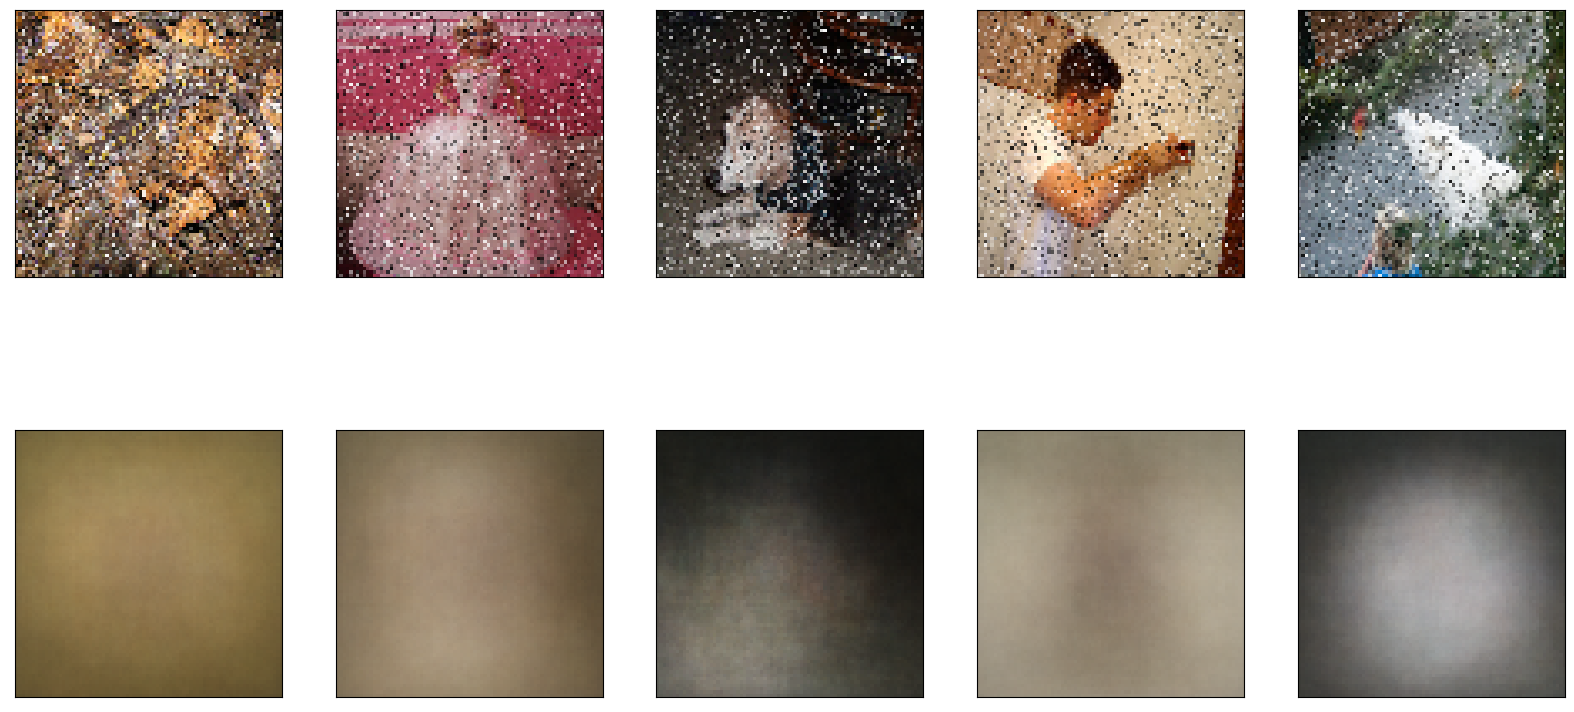

In [10]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(test_x_px[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df = pd.DataFrame(history.history)

<AxesSubplot: >

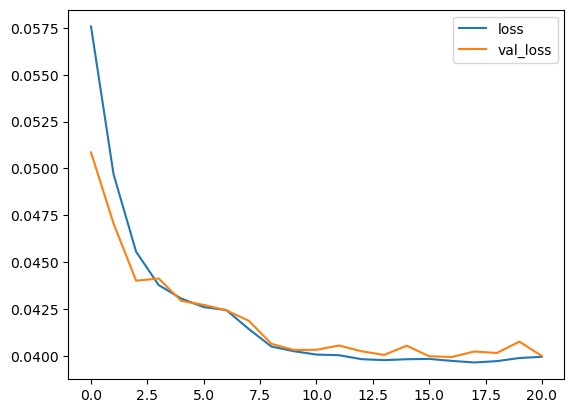

In [20]:
df[['loss','val_loss']].plot()

## Autoencoder - Fully connected 2 Low risk

In [22]:
encoder = Sequential()

encoder.add(Flatten(input_shape=[80,80,3]))
encoder.add(Dense(9600,activation="relu"))



decoder = Sequential()

decoder.add(Dense(80*80*3,input_shape=[9600],activation='sigmoid'))

decoder.add(Reshape([80,80,3]))

simple_autoencoder = Sequential([encoder,decoder])
simple_autoencoder.compile(optimizer='adam', loss='mse',metrics = ['mse'])



In [23]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

history = simple_autoencoder.fit(train_x_px, train_x,
            epochs=50,
            batch_size=64,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper]
            )

Epoch 1/50


2023-02-14 08:35:04.727404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.0462 - mse: 0.0462

2023-02-14 08:36:42.723099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 101s 202ms/step - loss: 0.0462 - mse: 0.0462 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 2/50
469/469 [==============================] - 91s 191ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0352 - val_mse: 0.0352
Epoch 3/50
469/469 [==============================] - 89s 190ms/step - loss: 0.0331 - mse: 0.0331 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 4/50
469/469 [==============================] - 89s 191ms/step - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 5/50
469/469 [==============================] - 89s 190ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 6/50
469/469 [==============================] - 89s 190ms/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 7/50
469/469 [==============================] - 89s 190ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 8/50
469/469 [==============================] - 89s 191ms/s

In [24]:
# simple_autoencoder.save('simple_auto_layer.h5')

In [25]:
predictions = simple_autoencoder.predict(test_x_px)

 5/94 [>.............................] - ETA: 2s

2023-02-14 09:17:33.541497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 2s 19ms/step


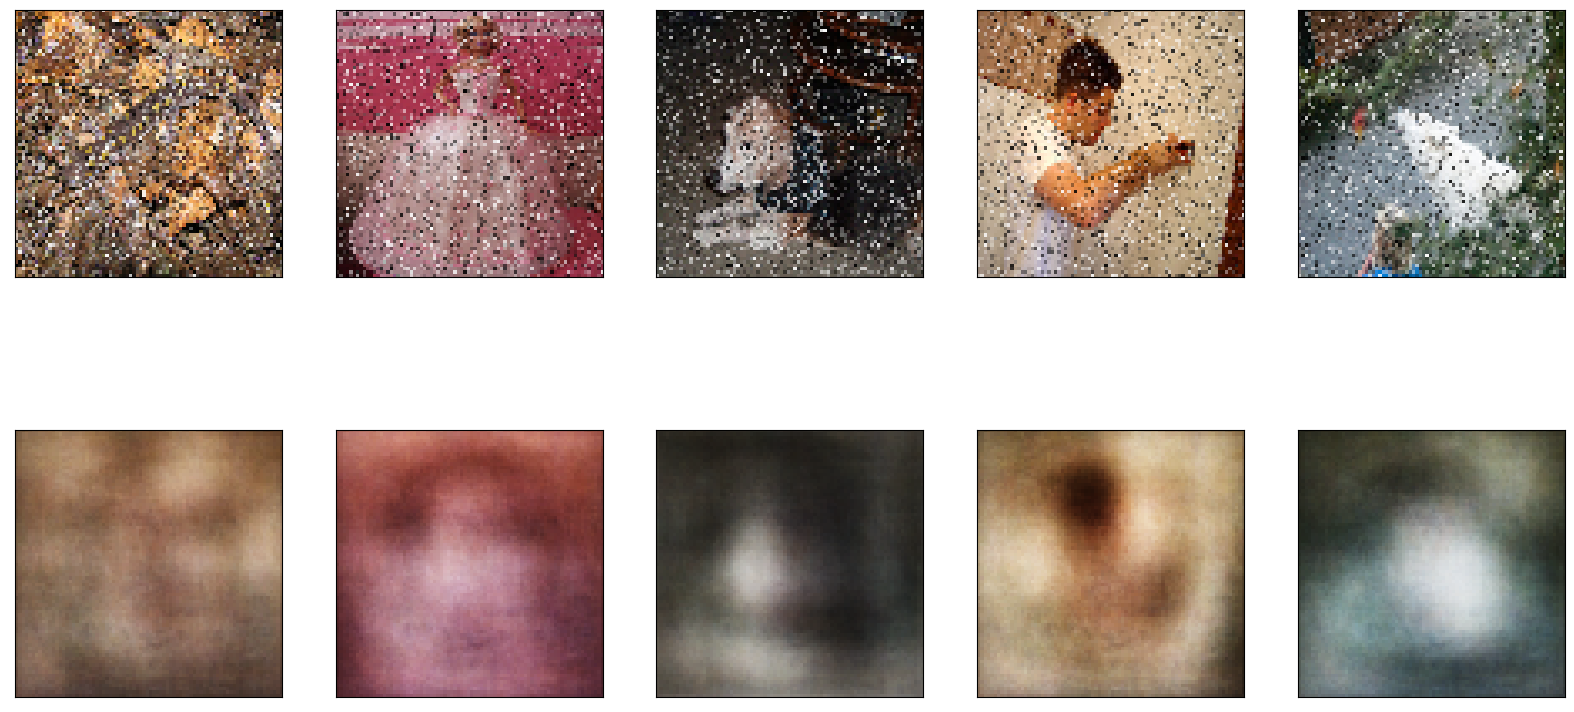

In [26]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(test_x_px[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [27]:
# simple_autoencoder.save('simple_autoencoder.h5')

In [30]:
df = pd.DataFrame(history.history)

<AxesSubplot: >

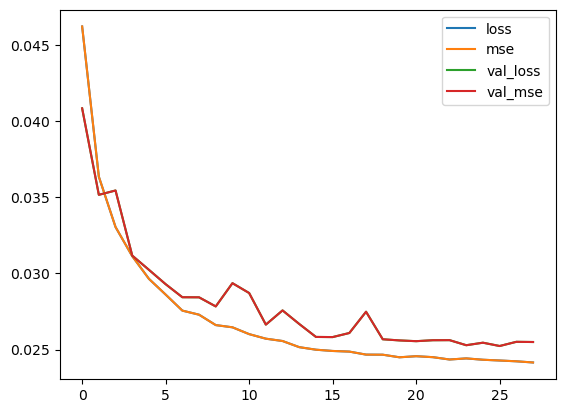

In [31]:
df.plot()

### Convulation encoder Medium risk

In [ ]:
Input_img = Input(shape=(80, 80, 3))  
   
#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')


In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

autoencoder.fit(train_x_px, train_x,
            epochs=50,
            batch_size=128,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper]
            )

In [ ]:
autoencoder.save('conv_auto.h5')

In [ ]:
predictions = autoencoder.predict(test_x_px)

In [ ]:
n = 5
plt.figure(figsize= (20,10))
images = [0,15,1899,1738,2001]
j = 0
for i in images:
    
  ax = plt.subplot(2, n, j+1)
  plt.imshow(test_x_px[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, j+1+n)
  plt.imshow(predictions[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
    
  j = j + 1

plt.show()

In [ ]:
pip install pydot

In [ ]:
pip install pydotplus

In [ ]:
pip install graphviz

In [ ]:
tf.keras.utils.plot_model(autoencoder)

In [ ]:
predictions = simple_auto.predict(test_x_px)

In [ ]:
n = 5
plt.figure(figsize= (20,10))
images = [0,15,1899,1738,2001]
j = 0
for i in images:
    
  ax = plt.subplot(2, n, j+1)
  plt.imshow(test_x_px[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, j+1+n)
  plt.imshow(predictions[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
    
  j = j + 1

plt.show()